In [84]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [85]:
dir = "p_date=2023-01-11-18_57_25"

In [86]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

65001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [87]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [88]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

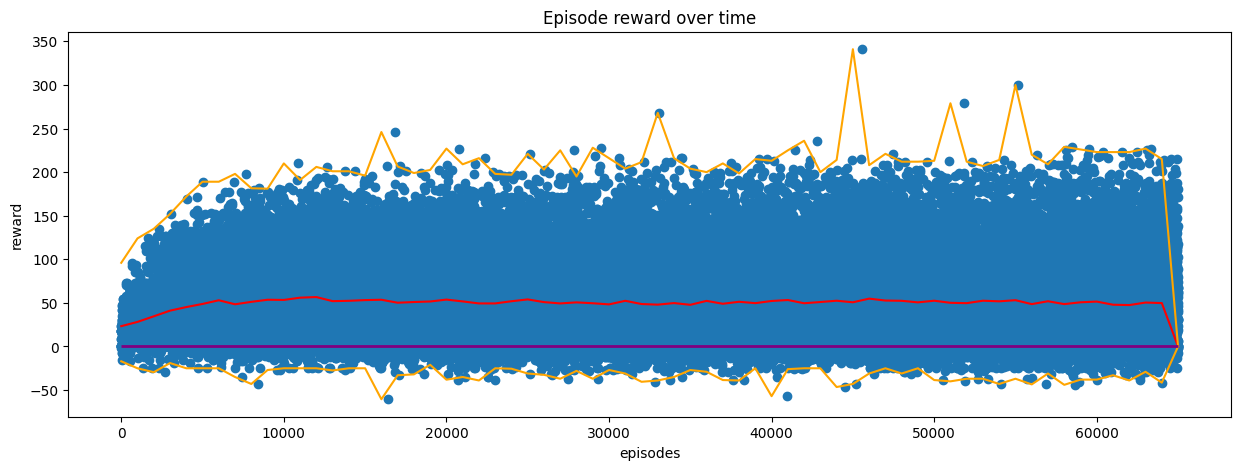

Maximum: 341.0
Average: 49.876215750526804

Values: 23.3 > 28.2 > 34.6 > 41.1 > 45.2 > 48.8 > 53.0 > 48.4 > 51.2 > 53.6 > 53.4 > 56.0 > 56.7 > 52.0 > 52.4 > 53.2 > 53.6 > 50.2 > 51.0 > 51.6 > 53.8 > 51.7 > 49.4 > 49.4 > 51.9 > 54.0 > 50.9 > 49.4 > 50.6 > 49.6 > 48.3 > 52.4 > 48.7 > 48.0 > 49.8 > 47.8 > 52.3 > 49.0 > 51.3 > 49.7 > 52.2 > 53.3 > 49.6 > 51.0 > 52.5 > 50.7 > 54.9 > 52.7 > 52.4 > 50.6 > 52.5 > 50.1 > 49.7 > 52.5 > 51.8 > 53.1 > 48.6 > 51.9 > 48.6 > 50.7 > 51.5 > 47.9 > 47.5 > 50.4 > 49.8 > 0.0

Minimum (last 1000): -60.5
Average (last 1000): 49.87640974359775
Maximum (last 1000): 341.0


In [89]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

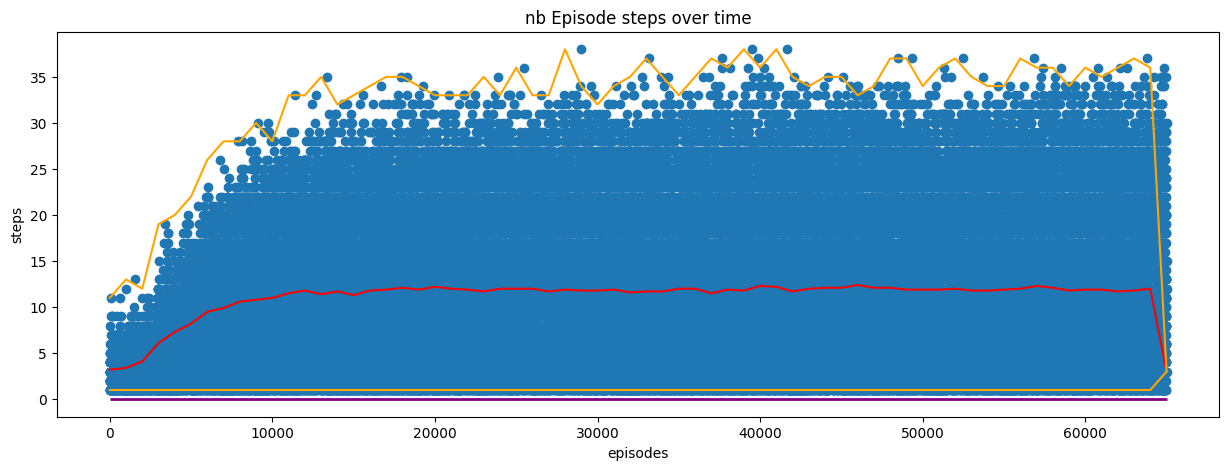

Maximum: 38
Average: 11.174997307733728

Values: 3.2 > 3.4 > 4.1 > 6.1 > 7.3 > 8.2 > 9.5 > 9.9 > 10.6 > 10.8 > 11.0 > 11.5 > 11.8 > 11.4 > 11.7 > 11.3 > 11.8 > 11.9 > 12.1 > 11.9 > 12.2 > 12.0 > 11.9 > 11.7 > 12.0 > 12.0 > 12.0 > 11.7 > 11.9 > 11.8 > 11.8 > 11.9 > 11.6 > 11.7 > 11.7 > 12.0 > 12.0 > 11.5 > 11.9 > 11.8 > 12.3 > 12.2 > 11.7 > 12.0 > 12.1 > 12.1 > 12.4 > 12.1 > 12.1 > 11.9 > 11.9 > 11.9 > 12.0 > 11.8 > 11.8 > 11.9 > 12.0 > 12.3 > 12.1 > 11.8 > 11.9 > 11.9 > 11.7 > 11.8 > 12.0 > 3

Minimum (last 1000): 1
Average (last 1000): 11.162263089639225
Maximum (last 1000): 38


In [90]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

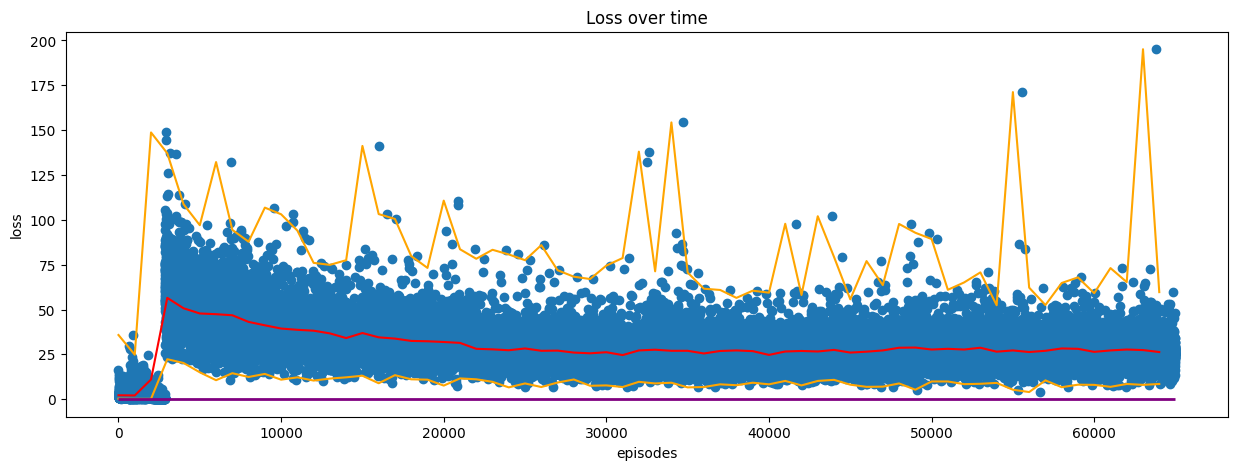

Maximum: 195.0543212890625
Average: 29.73251763918251

Values: 2.2 > 2.1 > 11.0 > 56.5 > 50.7 > 47.8 > 47.4 > 46.8 > 43.1 > 41.2 > 39.4 > 38.7 > 38.2 > 36.7 > 34.1 > 36.9 > 34.5 > 33.8 > 32.5 > 32.3 > 31.9 > 31.4 > 28.1 > 27.8 > 27.3 > 28.3 > 27.0 > 27.1 > 26.0 > 25.6 > 26.2 > 24.6 > 27.2 > 27.6 > 27.0 > 27.0 > 25.5 > 26.9 > 27.2 > 26.8 > 24.7 > 26.6 > 26.9 > 26.6 > 27.5 > 26.0 > 26.5 > 27.2 > 28.7 > 28.8 > 27.7 > 28.1 > 27.7 > 28.7 > 26.5 > 27.2 > 26.3 > 27.0 > 28.3 > 28.1 > 26.4 > 27.2 > 27.7 > 27.4 > 26.3

Minimum (last 1000): 0.1662837266921997
Average (last 1000): 29.7862457346979
Maximum (last 1000): 195.0543212890625


In [91]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

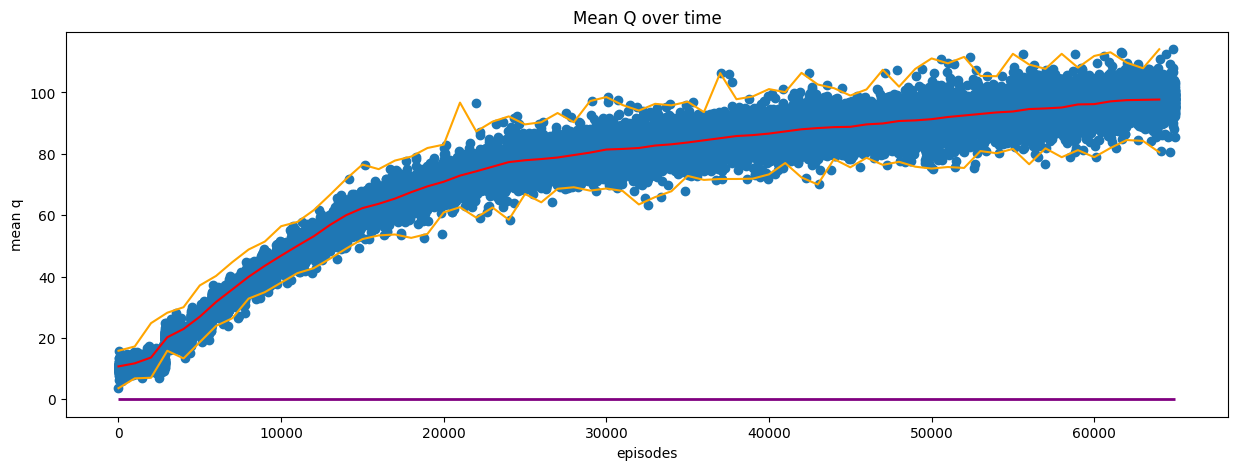

Maximum: 114.07568359375
Average: 73.31179318081645

Values: 10.7 > 11.7 > 13.6 > 20.2 > 22.9 > 26.9 > 31.7 > 35.8 > 39.9 > 43.5 > 46.8 > 50.0 > 53.1 > 56.8 > 60.0 > 62.3 > 63.7 > 65.4 > 67.5 > 69.4 > 70.9 > 72.9 > 74.3 > 75.8 > 77.3 > 77.9 > 78.3 > 78.8 > 79.6 > 80.4 > 81.4 > 81.6 > 81.9 > 82.7 > 83.1 > 83.7 > 84.4 > 85.1 > 85.8 > 86.1 > 86.6 > 87.3 > 88.0 > 88.4 > 88.7 > 88.8 > 89.6 > 89.9 > 90.7 > 90.9 > 91.3 > 92.0 > 92.5 > 93.0 > 93.5 > 93.8 > 94.6 > 94.8 > 95.1 > 96.1 > 96.2 > 97.1 > 97.5 > 97.6 > 97.7

Minimum (last 1000): 3.639643907546997
Average (last 1000): 72.93088013068612
Maximum (last 1000): 113.07093811035156


In [92]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

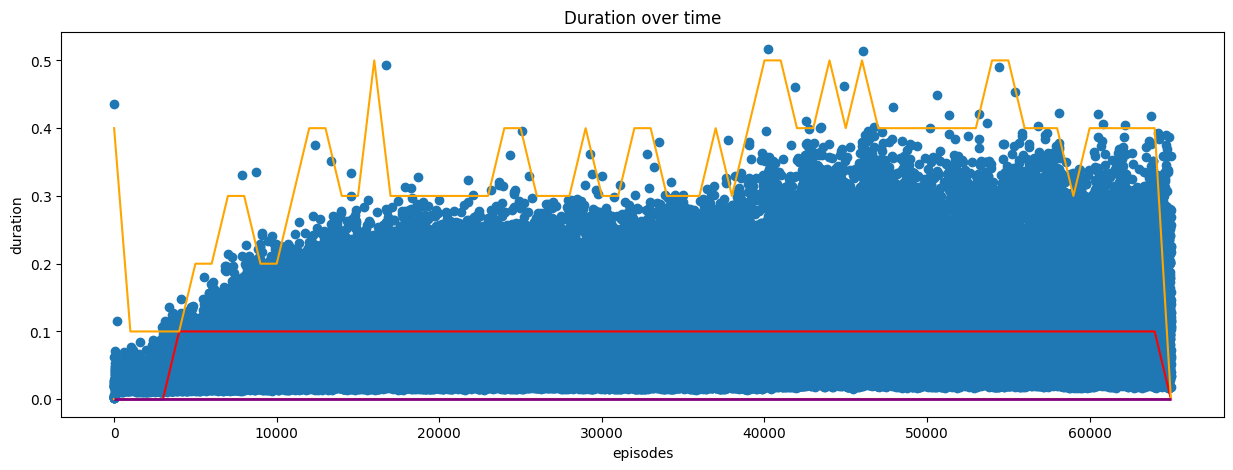

ZeroDivisionError: float division by zero

In [93]:
plot(duration, "Duration over time", "episodes", "duration")